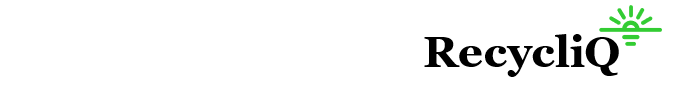

# **Research Project**
### OLUWATOBI EKUNDAYO - x19173105
#### **MSc. Data Analytics, National College of Ireland**

##**``Experiment II: Test Deep Learning Models with NEW waste image dataset``**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
  <li><span><a href="#Setup-Input-Pipeline" data-toc-modified-id="Setup-input-Pipeline-1"><span class="toc-item-num">1.&nbsp;&nbsp;</span>Setup Input Pipeline</a></span></li>
  <li><span><a href="#Experiment-2:-Preparing-The-Data" data-toc-modified-id="Experiment-2:-Preparing-The-Data-2"><span class="toc-item-num">2.&nbsp;&nbsp;</span>Preparing The Data</a></span></li>
  <li><span><a href="#Experiment-3:-MobileNetV2-Model" data-toc-modified-id="Experiment-3:-MobileNetV2-Model-3"><span class="toc-item-num">3.&nbsp;&nbsp;</span>Experiment 3: MobiletNetV2 Model</a></span></li>
  <li><span><a href="#Experiment-4:-VGG19-Model" data-toc-modified-id="Experiment-4:-VGG19-Model-4"><span class="toc-item-num">4.&nbsp;&nbsp;</span>Experiment 4: VGG19 Model</a></span></li>
  <li><span><a href="#Experiment-5:-DenseNet-Model" data-toc-modified-id="Experiment-5:-DenseNet-Model-5"><span class="toc-item-num">5.&nbsp;&nbsp;</span>Experiment 5: DenseNet Model</a></span></li>
  <li><span><a href="#Experiment-6:-ResNet152-Model" data-toc-modified-id="Experiment-6:-ResNet152-Model-6"><span class="toc-item-num">6.&nbsp;&nbsp;</span>Experiment 6: ResNet152 Model</a></span></li>
  <li><span><a href="#Experiment-7:-Inception-ResNet-V2-Model" data-toc-modified-id="Experiment-7:-Inception-ResNet-V2-Model-7"><span class="toc-item-num">7.&nbsp;&nbsp;</span>Experiment 7: Inception-ResNet-V2 Model</a></span></li>
  <li><span><a href="#Experiment-8:-Xception-Model" data-toc-modified-id="Experiment-8:-Xception-Model-8"><span class="toc-item-num">8.&nbsp;&nbsp;</span>Experiment 8: Xception Model</a></span></li>
  <li><span><a href="#EVALUATION:-Compare-Model-Performance" data-toc-modified-id="EVALUATION:-Compare-Model-Performance-8"><span class="toc-item-num">9.&nbsp;&nbsp;</span>EVALUATION: Compare Model Performance</a></span></li>  
 </ul></div>

## **Setup Input Pipeline**





### **Import Packages**

In [ ]:
#Install the package if it hasn't been installed on your colab before.
#!pip install scikit-learn

In [ ]:
import tensorflow as tf
import pandas as pd
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# use seaborn plotting defaults
import seaborn as sns; sns.set_theme()

tf.__version__

'2.3.0'

### **Setting Up Input Connection To Google Drive**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Get google drive authentication code**

In [ ]:
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

**Set path to extract file from gdrive**

In [ ]:
fid = drive.ListFile({'q':"title='dataset-recycliq.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('trashnet_dataset.zip')

**Unzip the file from google drive**

In [ ]:
!unzip \*.zip  && rm *.zip 

Streaming output truncated to the last 5000 lines.
  inflating: dataset-recycliq/plastic/bottle_1768.jpg  
  inflating: dataset-recycliq/plastic/bottle_1769.jpg  
  inflating: dataset-recycliq/plastic/bottle_177.jpg  
  inflating: dataset-recycliq/plastic/bottle_1770.jpg  
  inflating: dataset-recycliq/plastic/bottle_1771.jpg  
  inflating: dataset-recycliq/plastic/bottle_1772.jpg  
  inflating: dataset-recycliq/plastic/bottle_1773.jpg  
  inflating: dataset-recycliq/plastic/bottle_1774.jpg  
  inflating: dataset-recycliq/plastic/bottle_1775.jpg  
  inflating: dataset-recycliq/plastic/bottle_1776.jpg  
  inflating: dataset-recycliq/plastic/bottle_1777.jpg  
  inflating: dataset-recycliq/plastic/bottle_1778.jpg  
  inflating: dataset-recycliq/plastic/bottle_1779.jpg  
  inflating: dataset-recycliq/plastic/bottle_178.jpg  
  inflating: dataset-recycliq/plastic/bottle_1780.jpg  
  inflating: dataset-recycliq/plastic/bottle_1781.jpg  
  inflating: dataset-recycliq/plastic/bottle_1782.jpg  

### **Setup Input Pipeline**
Delete the .txt or .json files from Colab Files before running this code

In [ ]:
PATH = "/content/dataset-recycliq"
dirs = os.listdir(PATH)
for file in dirs:
  print (file)

metal
garbage
glass
paper
organic
plastic
e-waste


**Dataset Summary**

In [ ]:
from pathlib import Path

ds = len(dirs)
data_dir = Path(PATH)
image_count = len(list(data_dir.glob('*/*.jpg')))
print("There are a total of " + str(image_count) +
      " Images and " + str(ds) + " Classes in this dataset.")

There are a total of 32422 Images and 7 Classes in this dataset.


## **Preparing The Data**

Use **`ImageDataGenerator`** to rescale the images to **train and validation generator**.

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=20,
    subset='training')

val_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    seed=20,
    subset='validation')

Found 25941 images belonging to 7 classes.
Found 6482 images belonging to 7 classes.


**Extract converted ML Image/Label for the Training and Test data**

In [ ]:
for image_train, label_train in train_generator:
  break
Xtrain = image_train
ytrain = label_train
# Get Shape
image_train.shape, label_train.shape

((32, 224, 224, 3), (32, 7))

In [ ]:
for image_test, label_test in val_generator:
  break
Xtest = image_test
ytest = label_test
# Get Shape
image_test.shape, label_test.shape

((32, 224, 224, 3), (32, 7))

**Visualise the data**

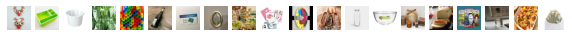

In [ ]:
sample_training_images, _ = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 20, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout
    plt.show()

plotImages(sample_training_images[:20])

**Save the labels in a file which will be downloaded later.**

In [ ]:
print (train_generator.class_indices)
wastelabels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('wastelabels.txt', 'w') as f:
  f.write(wastelabels)

{'e-waste': 0, 'garbage': 1, 'glass': 2, 'metal': 3, 'organic': 4, 'paper': 5, 'plastic': 6}


In [ ]:
!cat wastelabels.txt

e-waste
garbage
glass
metal
organic
paper
plastic

In [ ]:
ab = sorted(train_generator.class_indices.keys())
label_names =np.array(list(ab))
kb = sorted(val_generator.class_indices.keys())
labelval_names =np.array(list(kb))
type(labelval_names)

numpy.ndarray

## **Experiment 2: ``MobileNetV2`` Model**

### **Create base model from the pre-trained convnets**

We instantiate a **`MobileNetV2`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_3 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

9412608/9406464 [==============================] - 0s 0us/step

 Your selected Model has an input size of (224, 224, 3) 


### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_3.trainable = False

**Add a classification head**

In [ ]:
mnv2_model = tf.keras.Sequential([
  base_model_3,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
mnv2_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
mnv2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 2,626,887
Trainable params: 368,903
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(mnv2_model.trainable_variables)))

Number of trainable variables = 4


### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10
history_3 = mnv2_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 104s 128ms/step - loss: 0.5840 - accuracy: 0.7909 - val_loss: 0.4893 - val_accuracy: 0.8277
Epoch 2/10
811/811 [==============================] - 105s 130ms/step - loss: 0.3731 - accuracy: 0.8740 - val_loss: 0.4946 - val_accuracy: 0.8308
Epoch 3/10
811/811 [==============================] - 103s 127ms/step - loss: 0.3211 - accuracy: 0.8888 - val_loss: 0.5352 - val_accuracy: 0.8193
Epoch 4/10
811/811 [==============================] - 103s 127ms/step - loss: 0.2886 - accuracy: 0.8999 - val_loss: 0.4696 - val_accuracy: 0.8470
Epoch 5/10
811/811 [==============================] - 103s 127ms/step - loss: 0.2632 - accuracy: 0.9104 - val_loss: 0.5466 - val_accuracy: 0.8254
Epoch 6/10
811/811 [==============================] - 101s 125ms/step - loss: 0.2407 - accuracy: 0.9185 - val_loss: 0.5394 - val_accuracy: 0.8345
Epoch 7/10
811/811 [==============================] - 101s 125ms/step - loss: 0.2192 - accuracy: 0.9252 - val_loss: 0.5349 -

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

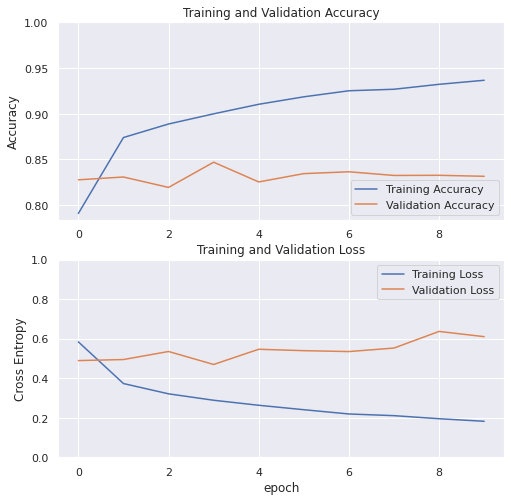

In [ ]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_3.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_3.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_3.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


**Compile the model** - using a much lower training rate.

In [ ]:
mnv2_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
mnv2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 2,626,887
Trainable params: 2,231,495
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(mnv2_model.trainable_variables)))

Number of trainable variables = 60


### **Complete model training**

In [ ]:
history_fine3 = mnv2_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 109s 134ms/step - loss: 0.4294 - accuracy: 0.8614 - val_loss: 0.6128 - val_accuracy: 0.8308
Epoch 2/10
811/811 [==============================] - 107s 132ms/step - loss: 0.2877 - accuracy: 0.9005 - val_loss: 0.5669 - val_accuracy: 0.8397
Epoch 3/10
811/811 [==============================] - 107s 132ms/step - loss: 0.2329 - accuracy: 0.9192 - val_loss: 0.5587 - val_accuracy: 0.8406
Epoch 4/10
811/811 [==============================] - 106s 131ms/step - loss: 0.1812 - accuracy: 0.9375 - val_loss: 0.5559 - val_accuracy: 0.8426
Epoch 5/10
811/811 [==============================] - 106s 131ms/step - loss: 0.1513 - accuracy: 0.9461 - val_loss: 0.5757 - val_accuracy: 0.8473
Epoch 6/10
811/811 [==============================] - 106s 130ms/step - loss: 0.1297 - accuracy: 0.9548 - val_loss: 0.6038 - val_accuracy: 0.8434
Epoch 7/10
811/811 [==============================] - 106s 131ms/step - loss: 0.1097 - accuracy: 0.9622 - val_loss: 0.5463 -

**Plot learning curves of the training and validation accuracy/loss**

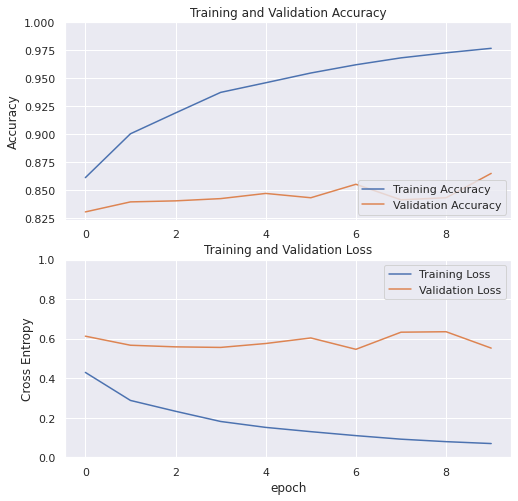

In [ ]:
acc = history_fine3.history['accuracy']
val_acc = history_fine3.history['val_accuracy']

loss = history_fine3.history['loss']
val_loss = history_fine3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(mnv2_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save/fine_tuning/assets


**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_3 = converter.convert()

with open('mnv2_model.tflite', 'wb') as f:
  f.write(tflite_model_3)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('mnv2_model.tflite')
files.download('wastelabels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Summary:

* **Model**: MobileNetV2 Model
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 3: ``VGG19`` Model**

### **Create base model from the pre-trained convnets**

We instantiate a **`VGG19`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_4 = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

80142336/80134624 [==============================] - 1s 0us/step

 Your selected Model has an input size of (224, 224, 3) 


### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_4.trainable = False

**Add a classification head**

In [ ]:
vgg_model = tf.keras.Sequential([
  base_model_4,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 20,172,103
Trainable params: 147,719
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(vgg_model.trainable_variables)))

Number of trainable variables = 4


### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_4 = vgg_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 171s 211ms/step - loss: 0.7897 - accuracy: 0.7152 - val_loss: 0.8082 - val_accuracy: 0.6944
Epoch 2/10
811/811 [==============================] - 169s 208ms/step - loss: 0.6249 - accuracy: 0.7764 - val_loss: 0.7390 - val_accuracy: 0.7132
Epoch 3/10
811/811 [==============================] - 168s 207ms/step - loss: 0.5758 - accuracy: 0.7924 - val_loss: 0.6814 - val_accuracy: 0.7438
Epoch 4/10
811/811 [==============================] - 167s 206ms/step - loss: 0.5443 - accuracy: 0.8068 - val_loss: 0.7313 - val_accuracy: 0.7143
Epoch 5/10
811/811 [==============================] - 167s 206ms/step - loss: 0.5133 - accuracy: 0.8170 - val_loss: 0.6627 - val_accuracy: 0.7414
Epoch 6/10
811/811 [==============================] - 167s 206ms/step - loss: 0.4927 - accuracy: 0.8222 - val_loss: 0.6712 - val_accuracy: 0.7431
Epoch 7/10
811/811 [==============================] - 167s 205ms/step - loss: 0.4774 - accuracy: 0.8283 - val_loss: 0.7238 -

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

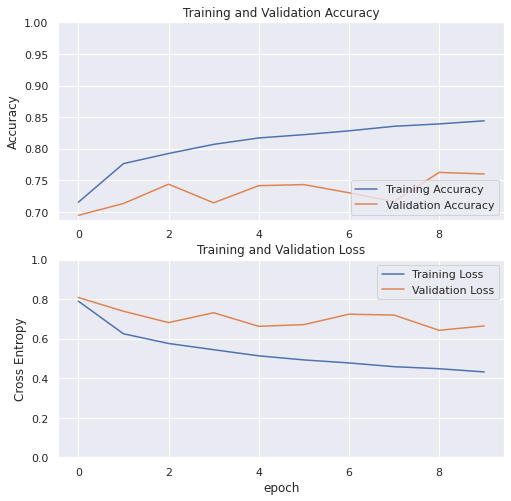

In [ ]:
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.


In [ ]:
base_model_4.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_4.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_4.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  22


**Compile the model** - using a much lower training rate.

In [ ]:
vgg_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 20,172,103
Trainable params: 147,719
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(vgg_model.trainable_variables)))

Number of trainable variables = 4


### **Complete model training**

In [ ]:
history_fine_4 = vgg_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 165s 204ms/step - loss: 0.3797 - accuracy: 0.8662 - val_loss: 0.6567 - val_accuracy: 0.7547
Epoch 2/10
811/811 [==============================] - 165s 204ms/step - loss: 0.3732 - accuracy: 0.8684 - val_loss: 0.6533 - val_accuracy: 0.7581
Epoch 3/10
811/811 [==============================] - 165s 203ms/step - loss: 0.3699 - accuracy: 0.8705 - val_loss: 0.6544 - val_accuracy: 0.7564
Epoch 4/10
811/811 [==============================] - 165s 203ms/step - loss: 0.3662 - accuracy: 0.8730 - val_loss: 0.6582 - val_accuracy: 0.7553
Epoch 5/10
811/811 [==============================] - 165s 203ms/step - loss: 0.3659 - accuracy: 0.8728 - val_loss: 0.6535 - val_accuracy: 0.7569
Epoch 6/10
811/811 [==============================] - 165s 203ms/step - loss: 0.3650 - accuracy: 0.8733 - val_loss: 0.6540 - val_accuracy: 0.7564
Epoch 7/10
811/811 [==============================] - 165s 203ms/step - loss: 0.3660 - accuracy: 0.8717 - val_loss: 0.6464 -

**Plot learning curves of the training and validation accuracy/loss**

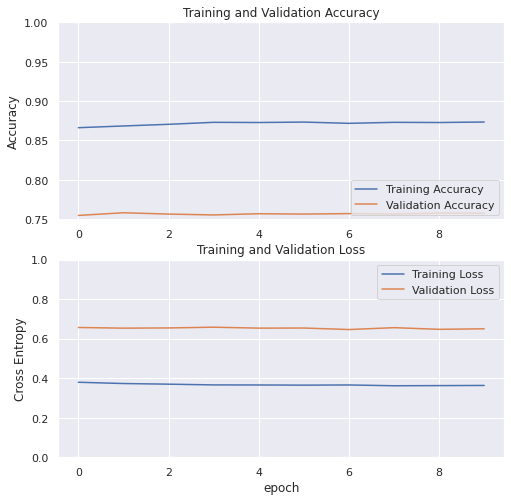

In [ ]:
acc = history_fine_4.history['accuracy']
val_acc = history_fine_4.history['val_accuracy']

loss = history_fine_4.history['loss']
val_loss = history_fine_4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(vgg_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save/fine_tuning/assets


**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_4 = converter.convert()

with open('vgg_model.tflite', 'wb') as f:
  f.write(tflite_model_4)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('vgg_model.tflite')
#files.download('wastelabels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Summary:

* **Model**: VGG19 Model
* **Size**: 19 MB
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 4: ``DenseNet`` Model**

### **Create base model from the pre-trained convnets**

We instantiate a **`DenseNet`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_5 = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

74842112/74836368 [==============================] - 1s 0us/step

 Your selected Model has an input size of (224, 224, 3) 


### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_5.trainable = False

**Add a classification head**

In [ ]:
dsn_model = tf.keras.Sequential([
  base_model_5,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
dsn_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
dsn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          552992    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 7)                 231       
Total params: 18,875,207
Trainable params: 553,223
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(dsn_model.trainable_variables)))

Number of trainable variables = 4


### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_5 = dsn_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 166s 204ms/step - loss: 0.4937 - accuracy: 0.8347 - val_loss: 0.4770 - val_accuracy: 0.8263
Epoch 2/10
811/811 [==============================] - 164s 202ms/step - loss: 0.3366 - accuracy: 0.8850 - val_loss: 0.4845 - val_accuracy: 0.8187
Epoch 3/10
811/811 [==============================] - 166s 205ms/step - loss: 0.3017 - accuracy: 0.8978 - val_loss: 0.4727 - val_accuracy: 0.8317
Epoch 4/10
811/811 [==============================] - 167s 206ms/step - loss: 0.2826 - accuracy: 0.9031 - val_loss: 0.4888 - val_accuracy: 0.8264
Epoch 5/10
811/811 [==============================] - 167s 206ms/step - loss: 0.2660 - accuracy: 0.9101 - val_loss: 0.4660 - val_accuracy: 0.8343
Epoch 6/10
811/811 [==============================] - 167s 206ms/step - loss: 0.2495 - accuracy: 0.9144 - val_loss: 0.4612 - val_accuracy: 0.8479
Epoch 7/10
811/811 [==============================] - 167s 206ms/step - loss: 0.2407 - accuracy: 0.9168 - val_loss: 0.4981 -

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

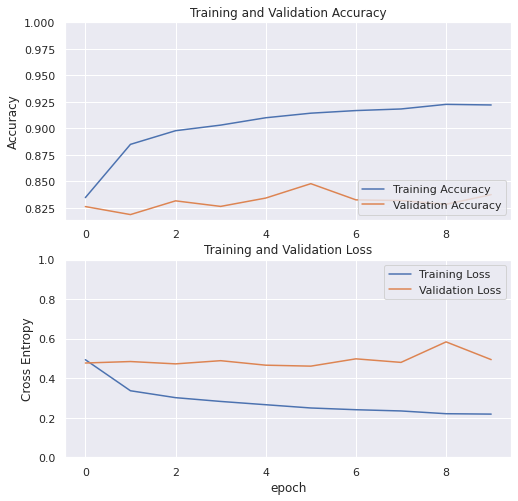

In [ ]:
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_5.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_5.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_5.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  707


**Compile the model** - using a much lower training rate.

In [ ]:
dsn_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
dsn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          552992    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 7)                 231       
Total params: 18,875,207
Trainable params: 17,841,479
Non-trainable params: 1,033,728
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(dsn_model.trainable_variables)))

Number of trainable variables = 523


### **Complete model training**

In [ ]:
history_fine_5 = dsn_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 381s 470ms/step - loss: 0.3070 - accuracy: 0.8982 - val_loss: 0.5198 - val_accuracy: 0.8436
Epoch 2/10
811/811 [==============================] - 377s 465ms/step - loss: 0.1411 - accuracy: 0.9530 - val_loss: 0.4401 - val_accuracy: 0.8672
Epoch 3/10
811/811 [==============================] - 377s 465ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.4897 - val_accuracy: 0.8619
Epoch 4/10
811/811 [==============================] - 378s 466ms/step - loss: 0.0513 - accuracy: 0.9842 - val_loss: 0.4106 - val_accuracy: 0.8835
Epoch 5/10
811/811 [==============================] - 378s 466ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.5035 - val_accuracy: 0.8630
Epoch 6/10
811/811 [==============================] - 377s 465ms/step - loss: 0.0258 - accuracy: 0.9925 - val_loss: 0.4740 - val_accuracy: 0.8726
Epoch 7/10
811/811 [==============================] - 377s 465ms/step - loss: 0.0208 - accuracy: 0.9950 - val_loss: 0.4895 -

**Plot learning curves of the training and validation accuracy/loss**

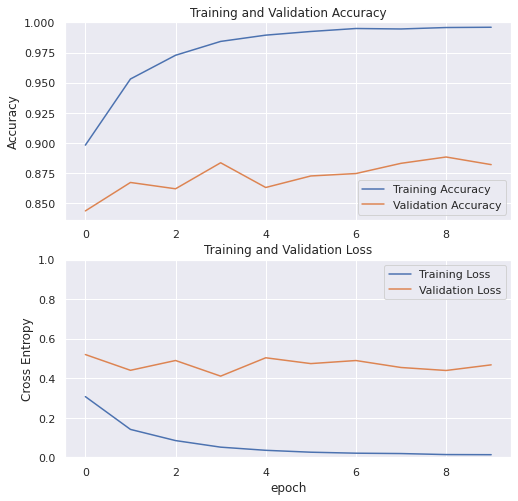

In [ ]:
acc = history_fine_5.history['accuracy']
val_acc = history_fine_5.history['val_accuracy']

loss = history_fine_5.history['loss']
val_loss = history_fine_5.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(dsn_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save/fine_tuning/assets


**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_5 = converter.convert()

with open('dsn_model.tflite', 'wb') as f:
  f.write(tflite_model_5)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('dsn_model.tflite')
#files.download('wastelabels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Summary:

* **Model**: DenseNet Model
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 5: ``ResNet152`` Model**

### **Create base model from the pre-trained convnets**

We instantiate a **`ResNet152`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_6 = tf.keras.applications.ResNet152(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

234700800/234698864 [==============================] - 2s 0us/step

 Your selected Model has an input size of (224, 224, 3) 


### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_6.trainable = False

**Add a classification head**

In [ ]:
rsn152_model = tf.keras.Sequential([
  base_model_6,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
rsn152_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
rsn152_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          589856    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 58,961,031
Trainable params: 590,087
Non-trainable params: 58,370,944
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(rsn152_model.trainable_variables)))

Number of trainable variables = 4


### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_6 = rsn152_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 285s 352ms/step - loss: 1.3967 - accuracy: 0.4569 - val_loss: 1.3622 - val_accuracy: 0.4065
Epoch 2/10
811/811 [==============================] - 282s 348ms/step - loss: 1.3101 - accuracy: 0.4967 - val_loss: 1.3036 - val_accuracy: 0.4855
Epoch 3/10
811/811 [==============================] - 282s 348ms/step - loss: 1.2665 - accuracy: 0.5159 - val_loss: 1.2925 - val_accuracy: 0.4909
Epoch 4/10
811/811 [==============================] - 282s 348ms/step - loss: 1.2392 - accuracy: 0.5257 - val_loss: 1.3149 - val_accuracy: 0.4767
Epoch 5/10
811/811 [==============================] - 282s 348ms/step - loss: 1.2218 - accuracy: 0.5301 - val_loss: 1.3176 - val_accuracy: 0.4397
Epoch 6/10
811/811 [==============================] - 282s 348ms/step - loss: 1.2078 - accuracy: 0.5344 - val_loss: 1.2819 - val_accuracy: 0.4983
Epoch 7/10
811/811 [==============================] - 282s 347ms/step - loss: 1.1979 - accuracy: 0.5404 - val_loss: 1.2693 -

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

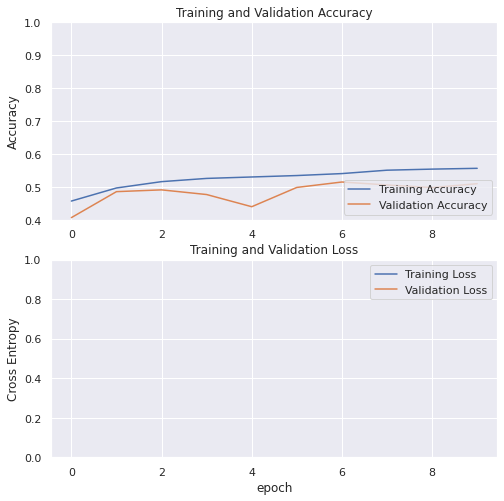

In [ ]:
acc = history_6.history['accuracy']
val_acc = history_6.history['val_accuracy']

loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_6.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_6.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_6.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  515


**Compile the model** - using a much lower training rate.

In [ ]:
rsn152_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
rsn152_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          589856    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 58,961,031
Trainable params: 56,797,959
Non-trainable params: 2,163,072
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(rsn152_model.trainable_variables)))

Number of trainable variables = 504


### **Complete model training**

In [ ]:
history_fine_6 = rsn152_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 626s 772ms/step - loss: 2.2842 - accuracy: 0.5197 - val_loss: 1.2314 - val_accuracy: 0.5298
Epoch 2/10
811/811 [==============================] - 623s 768ms/step - loss: 0.9343 - accuracy: 0.6506 - val_loss: 1.0661 - val_accuracy: 0.5795
Epoch 3/10
811/811 [==============================] - 623s 768ms/step - loss: 0.7397 - accuracy: 0.7282 - val_loss: 1.8126 - val_accuracy: 0.4762
Epoch 4/10
811/811 [==============================] - 623s 768ms/step - loss: 0.5838 - accuracy: 0.7881 - val_loss: 1.0454 - val_accuracy: 0.6325
Epoch 5/10
811/811 [==============================] - 623s 768ms/step - loss: 0.4487 - accuracy: 0.8388 - val_loss: 0.9679 - val_accuracy: 0.6945
Epoch 6/10
811/811 [==============================] - 623s 768ms/step - loss: 0.3408 - accuracy: 0.8768 - val_loss: 1.0582 - val_accuracy: 0.6839
Epoch 7/10
811/811 [==============================] - 623s 768ms/step - loss: 0.2621 - accuracy: 0.9061 - val_loss: 1.2238 -

**Plot learning curves of the training and validation accuracy/loss**

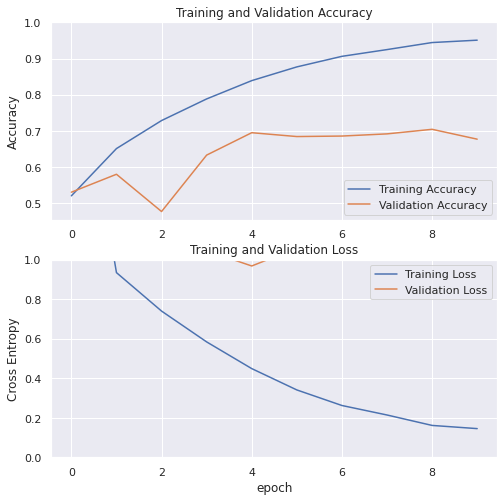

In [ ]:
acc = history_fine_6.history['accuracy']
val_acc = history_fine_6.history['val_accuracy']

loss = history_fine_6.history['loss']
val_loss = history_fine_6.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(rsn152_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


INFO:tensorflow:Assets written to: save/fine_tuning/assets


**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_6 = converter.convert()

with open('rsn152_model.tflite', 'wb') as f:
  f.write(tflite_model_6)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('rsn152_model.tflite')
#files.download('wastelabels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Summary:

* **Model**: ResNet152 Model
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 6: ``Inception-ResNet-V2`` Model**

**NOTE: Input shape for `Inception-ResNet-V2` must be (299, 299, 3)**

### **Create base model from the pre-trained convnets**

We instantiate a **`Inception-ResNet-V2`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_7 = tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

219062272/219055592 [==============================] - 1s 0us/step

 Your selected Model has an input size of (299, 299, 3) 


### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_7.trainable = False

**Add a classification head**

In [ ]:
irsnv2_model = tf.keras.Sequential([
  base_model_7,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
irsnv2_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
irsnv2_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 6, 6, 32)          442400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 54,779,367
Trainable params: 442,631
Non-trainable params: 54,336,736
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(irsnv2_model.trainable_variables)))

Number of trainable variables = 4


### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_7 = irsnv2_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 349s 431ms/step - loss: 0.4440 - accuracy: 0.8536 - val_loss: 0.4766 - val_accuracy: 0.8348
Epoch 2/10
811/811 [==============================] - 344s 424ms/step - loss: 0.3158 - accuracy: 0.8956 - val_loss: 0.4488 - val_accuracy: 0.8309
Epoch 3/10
811/811 [==============================] - 343s 423ms/step - loss: 0.2653 - accuracy: 0.9110 - val_loss: 0.4310 - val_accuracy: 0.8505
Epoch 4/10
811/811 [==============================] - 343s 422ms/step - loss: 0.2432 - accuracy: 0.9171 - val_loss: 0.4100 - val_accuracy: 0.8513
Epoch 5/10
811/811 [==============================] - 343s 423ms/step - loss: 0.2205 - accuracy: 0.9237 - val_loss: 0.4006 - val_accuracy: 0.8601
Epoch 6/10
811/811 [==============================] - 343s 423ms/step - loss: 0.1991 - accuracy: 0.9304 - val_loss: 0.3997 - val_accuracy: 0.8699
Epoch 7/10
811/811 [==============================] - 343s 423ms/step - loss: 0.1812 - accuracy: 0.9367 - val_loss: 0.4874 -

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

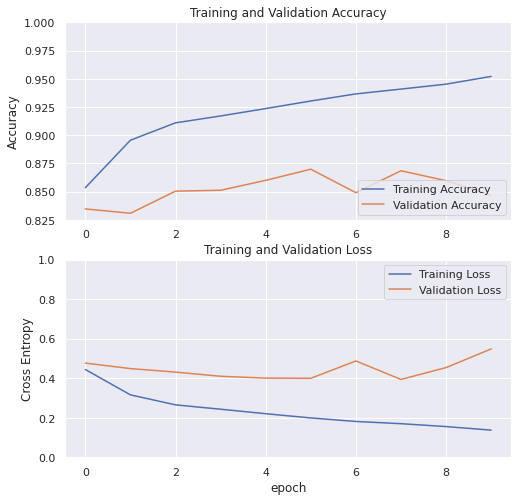

In [ ]:
acc = history_7.history['accuracy']
val_acc = history_7.history['val_accuracy']

loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_7.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_7.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_7.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  780


**Compile the model** - using a much lower training rate.

In [ ]:
irsnv2_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
irsnv2_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 6, 6, 32)          442400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 54,779,367
Trainable params: 53,951,255
Non-trainable params: 828,112
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(irsnv2_model.trainable_variables)))

Number of trainable variables = 428


### **Complete model training**

In [ ]:
history_fine_7 = irsnv2_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 847s 1s/step - loss: 0.2237 - accuracy: 0.9226 - val_loss: 0.3653 - val_accuracy: 0.8806
Epoch 2/10
811/811 [==============================] - 843s 1s/step - loss: 0.0915 - accuracy: 0.9700 - val_loss: 0.3769 - val_accuracy: 0.8868
Epoch 3/10
811/811 [==============================] - 845s 1s/step - loss: 0.0521 - accuracy: 0.9832 - val_loss: 0.3966 - val_accuracy: 0.8905
Epoch 4/10
811/811 [==============================] - 844s 1s/step - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.3420 - val_accuracy: 0.9116
Epoch 5/10
811/811 [==============================] - 844s 1s/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.4625 - val_accuracy: 0.8943
Epoch 6/10
811/811 [==============================] - 843s 1s/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.4194 - val_accuracy: 0.9014
Epoch 7/10
811/811 [==============================] - 844s 1s/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.3425 - val_accuracy: 0.9221

**Plot learning curves of the training and validation accuracy/loss**

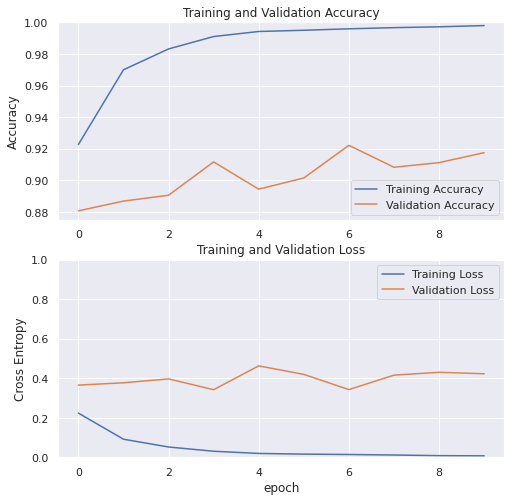

In [ ]:
acc = history_fine_7.history['accuracy']
val_acc = history_fine_7.history['val_accuracy']

loss = history_fine_7.history['loss']
val_loss = history_fine_7.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(irsnv2_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


INFO:tensorflow:Assets written to: save/fine_tuning/assets


**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_7 = converter.convert()

with open('irsnv2_model.tflite', 'wb') as f:
  f.write(tflite_model_7)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('irsnv2_model.tflite')
#files.download('wastelabels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Summary:

* **Model**: Inception-Resnet-V2 Model
* **Size**: 52.73 MB
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 7: ``Xception`` Model**

**NOTE: Input shape for `Xception` must be (299, 299, 3)**

### **Create base model from the pre-trained convnets**

We instantiate a **`Inception-ResNet-V2`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_8 = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

83689472/83683744 [==============================] - 1s 0us/step

 Your selected Model has an input size of (299, 299, 3) 


### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_8.trainable = False

**Add a classification head**

In [ ]:
xcep_model = tf.keras.Sequential([
  base_model_8,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(7, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
xcep_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
xcep_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 8, 8, 32)          589856    
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 231       
Total params: 21,451,567
Trainable params: 590,087
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(xcep_model.trainable_variables)))

Number of trainable variables = 4


### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_8 = xcep_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 283s 349ms/step - loss: 0.3703 - accuracy: 0.8747 - val_loss: 0.3886 - val_accuracy: 0.8630
Epoch 2/10
811/811 [==============================] - 280s 345ms/step - loss: 0.2372 - accuracy: 0.9168 - val_loss: 0.3755 - val_accuracy: 0.8699
Epoch 3/10
811/811 [==============================] - 280s 345ms/step - loss: 0.1868 - accuracy: 0.9344 - val_loss: 0.3608 - val_accuracy: 0.8821
Epoch 4/10
811/811 [==============================] - 280s 345ms/step - loss: 0.1483 - accuracy: 0.9489 - val_loss: 0.4218 - val_accuracy: 0.8764
Epoch 5/10
811/811 [==============================] - 279s 345ms/step - loss: 0.1227 - accuracy: 0.9576 - val_loss: 0.6475 - val_accuracy: 0.8400
Epoch 6/10
811/811 [==============================] - 280s 346ms/step - loss: 0.1009 - accuracy: 0.9643 - val_loss: 0.5481 - val_accuracy: 0.8599
Epoch 7/10
811/811 [==============================] - 280s 346ms/step - loss: 0.0838 - accuracy: 0.9704 - val_loss: 0.5410 -

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

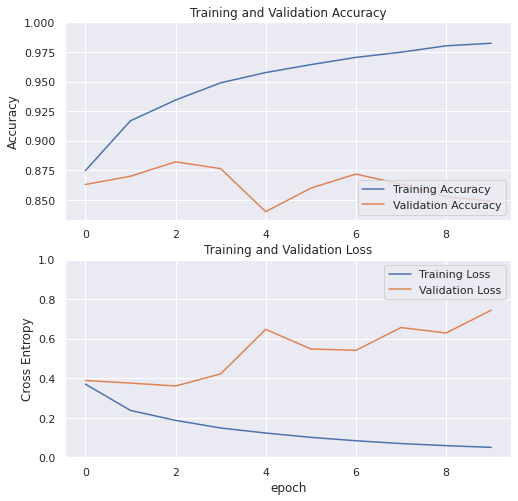

In [ ]:
acc = history_8.history['accuracy']
val_acc = history_8.history['val_accuracy']

loss = history_8.history['loss']
val_loss = history_8.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_8.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_8.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_8.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  132


**Compile the model** - using a much lower training rate.

In [ ]:
xcep_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
irsnv2_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 6, 6, 32)          442400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 54,779,367
Trainable params: 53,951,255
Non-trainable params: 828,112
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(xcep_model.trainable_variables)))

Number of trainable variables = 43


### **Complete model training**

In [ ]:
history_fine_8 = xcep_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/10
811/811 [==============================] - 384s 473ms/step - loss: 0.1075 - accuracy: 0.9643 - val_loss: 0.7093 - val_accuracy: 0.8608
Epoch 2/10
811/811 [==============================] - 382s 472ms/step - loss: 0.0449 - accuracy: 0.9850 - val_loss: 0.7236 - val_accuracy: 0.8550
Epoch 3/10
811/811 [==============================] - 381s 470ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.7145 - val_accuracy: 0.8632
Epoch 4/10
811/811 [==============================] - 381s 470ms/step - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.7033 - val_accuracy: 0.8676
Epoch 5/10
811/811 [==============================] - 381s 470ms/step - loss: 0.0166 - accuracy: 0.9955 - val_loss: 0.7190 - val_accuracy: 0.8676
Epoch 6/10
811/811 [==============================] - 381s 470ms/step - loss: 0.0132 - accuracy: 0.9968 - val_loss: 0.7519 - val_accuracy: 0.8666
Epoch 7/10
811/811 [==============================] - 382s 471ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.7498 -

**Plot learning curves of the training and validation accuracy/loss**

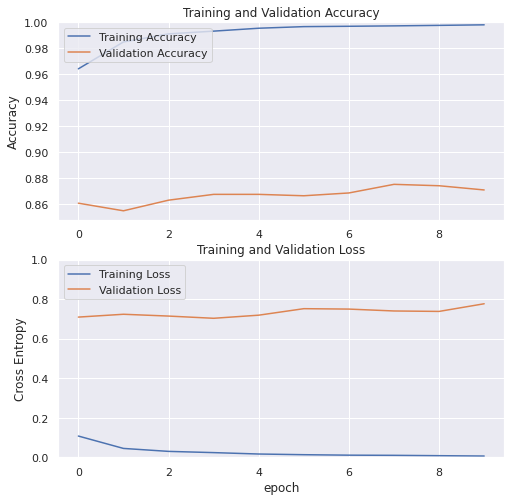

In [ ]:
acc = history_fine_8.history['accuracy']
val_acc = history_fine_8.history['val_accuracy']

loss = history_fine_8.history['loss']
val_loss = history_fine_8.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(xcep_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


INFO:tensorflow:Assets written to: save/fine_tuning/assets


**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_8 = converter.convert()

with open('xcep_model.tflite', 'wb') as f:
  f.write(tflite_model_8)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('xcep_model.tflite')
#files.download('wastelabels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Summary:

* **Model**: Xception Model
* **Size**: 20.56 MB
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Testing with ``SVM`` Model**


**Reshaping the Train and Test data**

In [ ]:
# When using size 224 reshape with (32*6,112*224)
# When using size 256 reshape with (32*6,128*256)

X_train = Xtrain.reshape(32*7,96*224)
X_test = Xtest.reshape(32*7,96*224)

y_train = ytrain.flatten()
y_test = ytest.flatten()

**Support Vector Machine (SVM)**

In [ ]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Evaluation Metrics**

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# SVM Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# SVM Model Precision
print("\nPrecision:",metrics.precision_score(y_test, y_pred))
# SVM Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6919642857142857

Precision: 0.12244897959183673
Recall: 0.1875


**Converting numerical labels to categorical format**

In [ ]:
def ToCategory(zz):
    bb=0
    jj=list()
    
    for n in zz:
        if (n == [1., 0., 0., 0., 0., 0., 0.]):
            bb = 0
        if (n == [0., 1., 0., 0., 0., 0., 0.]):
            bb = 1
        if (n == [0., 0., 1., 0., 0., 0., 0.]):
            bb = 2
        if (n == [0., 0., 0., 1., 0., 0., 0.]):
            bb = 3
        if (n == [0., 0., 0., 0., 1., 0., 0.]):
            bb = 4
        if (n == [0., 0., 0., 0., 0., 1., 0.]):
            bb = 5
        if (n == [0., 0., 0., 0., 0., 0., 1.]):
            bb = 6            
        jj.append(bb)
    kk = np.asarray(jj)
    return kk

# Convert test label to category format
cc = ytest.tolist()
yTEST = ToCategory(cc)

In [ ]:
yPRED

array([4, 4, 4, 4, 4, 4, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

**Display the confusion matrix between the classes**

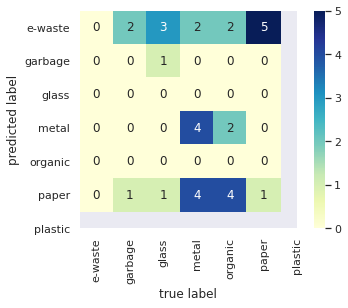

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert prediction label to category format
yy = y_pred.reshape(32,7)
dd = yy.tolist()
yPRED = ToCategory(dd)

mat = confusion_matrix(yTEST, yPRED)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### **Using PCA (feature extraction) + SVM (classifier) Model**

In [ ]:
# Set PCA for feature extraction
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
# Set SVM for classification
svc = SVC(kernel='rbf', class_weight='balanced')
# Setup the model
svm_model = make_pipeline(pca, svc)

Use **``grid search cross-validation``** to explore combinations of parameters.
Here we will adjust **``C``** (which controls the margin hardness) and **``gamma``** (which controls the size of the radial basis function kernel), and determine the best model:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50, 100],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}

grid = GridSearchCV(svm_model, param_grid, cv=5)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 2min 14s, sys: 18 s, total: 2min 32s
Wall time: 1min 17s
{'svc__C': 1, 'svc__gamma': 0.005}


**``The optimal values from the grid search falls toward the middle of the grid``**

**Using the cross-validated model** - Predict the labels for the test data, which the model has not yet seen.

In [ ]:
svm_model = grid.best_estimator_
yfit = svm_model.predict(X_test)

**Evaluation Metrics**

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yfit))

Accuracy: 0.8169642857142857


**Using the classification report we evaluate the estimator's performance**

In [ ]:
from sklearn.metrics import classification_report

# Convert prediction label to category format
gg = yfit.reshape(32,7)
pp = gg.tolist()
yFIT = ToCategory(pp)

print(classification_report(yTEST, yFIT, target_names=label_names))

ValueError: ignored

**Display the confusion matrix between the classes**

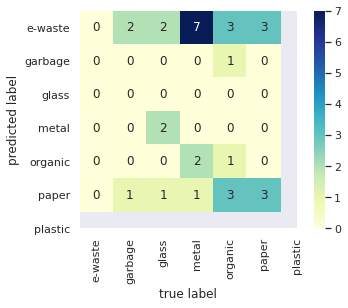

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yTEST, yFIT)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Summary:

* **Model**: State-of-the-art Model (SVM)
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:
* **Accuracy**: 0.816

## **EVALUATION: Compare Model Performance**

### **All trained models**

In [ ]:
#history_fine

#svm_model
#mnv2_model
#efn_model
#dsn_model
#rsn152_model
#irsnv2_model

**Plot learning curves of the training and validation accuracy/loss**

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Export model performance**

In [ ]:
with open('irsnv2_model.tflite', 'wb') as f:
  f.write(tflite_model_7)

**Download the files**

In [ ]:
from google.colab import files

files.download('modelperformance.xls')
files.download('modelperformance.jpeg')

### Summary:

* **Using a pre-trained model for feature extraction**:  When working with a small dataset, it is common to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training.
In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

* **Fine-tuning a pre-trained model**: To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning.
In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the orginial dataset that the pre-trained model was trained on.
